# Runge-Kutta (cuarto orden)

---


In [4]:
from pylab import *

In [41]:
def rk2(ec_edo, t, x0, args=[], delta =0.1):
    t_n = arange(t[0], t[1]+delta, delta)
    M, N = len(x0), len(t_n)
    sol = zeros ( (M,N))
    sol[:,0] = x0
    print(sol[:,0], 'Aqui!')
    for i in range (N-1):
        t_med = 0.5*(t_n[i] + t_n[i+1])
        x_med = sol[:, i] + 0.5 * delta * ec_edo(t_n[i], sol[:, i])
        sol[:, i+1] = sol[:, i] + delta*ec_edo(t_med, x_med)
    return sol, t_n

def rk4(ec_edo, t, x0, args=[], delta =0.1):
    t_n = arange(t[0], t[1]+delta, delta)
    M, N = len(x0), len(t_n)
    sol = zeros ( (M,N))
    sol[:, 0] = x0
    for i in range (N-1):
        t_med = 0.5*(t_n[i] + t_n[i+1])
        k1 = ec_edo(t_n[i], sol[:,i])
        x_med = sol[:, i] + 0.5 * delta * k1
        k2 = ec_edo(t_med,x_med)
        x_med = sol[:, i] + 0.5*delta*k2
        k3 = ec_edo(t_med,x_med)
        x_med = sol[:, i] + delta * k3
        k4 = ec_edo(t_n[i+1], x_med)
        sol[:, i+1] = sol[:, i] + (delta/6)*(k1 + 2*k2 + 2*k3 + k4)
    return sol, t_n
    

In [42]:
def ec_dif3(t,y):
    return array([y[1],-y[0]])

y_rk2, t_2 = rk2(ec_dif3,[0,3*pi], [7,0])
y_rk4, t_4 = rk4(ec_dif3,[0,3*pi], [7,0])



[7. 0.] Aqui!


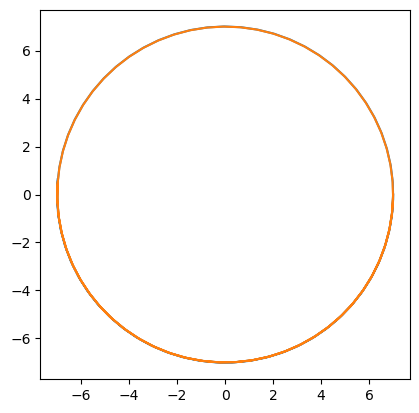

In [26]:
plot(y_rk2[0], y_rk2[1], label = 'rk2')
plot(y_rk4[0], y_rk4[1], label = 'rk2')
gca().set_aspect('equal')

show()

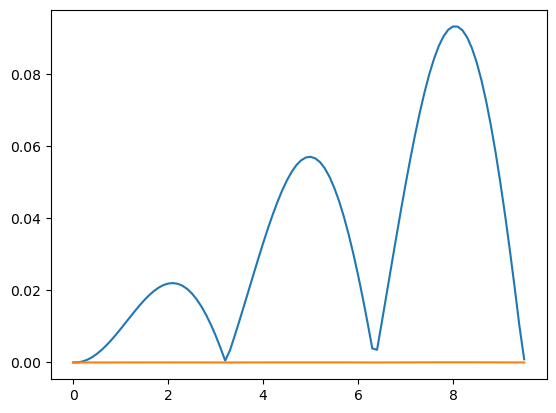

In [27]:
plot(t_2, abs(7*cos(t_2) - y_rk2[0]))
plot(t_4, abs(7*cos(t_4) - y_rk4[0]))
show()